In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

----load the training data

In [3]:
df_train=pd.read_csv("training_data.csv")
text_train=df_train['text']

In [4]:
star_train=df_train.stars

In [5]:
df_test=pd.read_csv("test_data.csv")
text_test=df_test.text

In [6]:
df_sub=pd.read_csv("sample_submission.csv",names=np.array(['id','stars']))
star_test=df_sub.stars

----CountVectorizer(ngram_range=(2, 2))

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
vectorizer = CountVectorizer(ngram_range=(2, 2))
vectorizer.fit(text_train)
cv2_train=vectorizer.transform(text_train)
cv2_test=vectorizer.transform(text_test)

----LogisticRegression

In [9]:
from sklearn.linear_model import LogisticRegression

logr=LogisticRegression()
logr.fit(cv2_train,star_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
logr.score(cv2_test,star_test)

0.2031952071892162

In [12]:
from sklearn.linear_model import LogisticRegression

logr=LogisticRegression()

def logreg(logr,train,test,star_train):
    
    star_train_1=np.zeros((len(star_train)))
    star_train_2=np.zeros((len(star_train)))
    star_train_3=np.zeros((len(star_train)))
    star_train_4=np.zeros((len(star_train)))
    star_train_5=np.zeros((len(star_train)))
    
    star_train_1[star_train==1]=1
    star_train_2[star_train==2]=1
    star_train_3[star_train==3]=1
    star_train_4[star_train==4]=1
    star_train_5[star_train==5]=1

    """for i in range(len(star_train)):
        if star_train[i]==1:
            star_train_1[i]=1
        elif star_train[i]==2:
            star_train_2[i]=1
        elif star_train[i]==3:
            star_train_3[i]=1
        elif star_train[i]==4:
            star_train_4[i]=1
        elif star_train[i]==5:
            star_train_5[i]=1"""
    
    logr.fit(train,star_train_1)
    star_pred_1=logr.predict(test)
    
    logr.fit(train,star_train_2)
    star_pred_2=logr.predict(test)
    
    logr.fit(train,star_train_3)
    star_pred_3=logr.predict(test)
    
    logr.fit(train,star_train_4)
    star_pred_4=logr.predict(test)
    
    logr.fit(train,star_train_5)
    star_pred_5=logr.predict(test)
    
    star_pred=np.zeros((len(star_pred_1)))
    star_pred[star_pred_1==1]=1
    star_pred[star_pred_2==1]=2
    star_pred[star_pred_3==1]=3
    star_pred[star_pred_4==1]=4
    star_pred[star_pred_5==1]=5
    
    return star_pred    


In [13]:
star_pred=logreg(logr, cv2_train, cv2_test, star_train)

In [14]:
np.mean(star_pred==star_test)

0.10683974038941588

----KNeighborsClassifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()

In [16]:
rng = np.random.RandomState(0)

permutation = rng.permutation(len(star_train))
cv2_train, star_train = cv2_train[permutation], star_train[permutation]

In [17]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNC, cv2_train, star_train)
print(scores)
print(np.mean(scores))

[0.17135358 0.33195799 0.33558559]
0.27963238529511986


In [22]:
knc=KNeighborsClassifier(n_neighbors=10).fit(cv2_train,star_train)
star_pred_cv2K=knc.predict(cv2_test)

In [23]:
np.mean(star_pred_cv2K==star_test)

0.20868696954568147

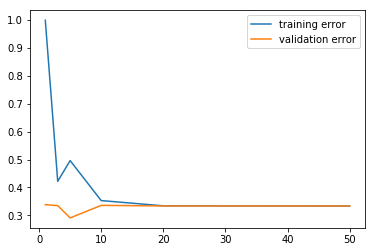

In [24]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5)

from sklearn.model_selection import validation_curve
n_neighbors=[1,3,5,10,20,50]
train_errors,validation_errors=validation_curve(KNC,cv2_train,star_train,param_name='n_neighbors',param_range=n_neighbors,cv=cv)

plt.plot(n_neighbors,train_errors.mean(axis=1),label='training error')
plt.plot(n_neighbors,validation_errors.mean(axis=1),label='validation error')
plt.legend(loc='best')

In [25]:
knc=KNeighborsClassifier(n_neighbors=20).fit(cv2_train,star_train)
star_pred_cv2K=knc.predict(cv2_test)

np.mean(star_pred_cv2K==star_test)

0.20968547179231153

----LinearRegression

In [26]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [27]:
LR.fit(cv2_train,star_train)
star_pred_LR=LR.predict(cv2_test)

LR.score(cv2_test,star_test)

-1.0839954006234467

----KNeighborsRegressor()

In [28]:
from sklearn.neighbors import KNeighborsRegressor
KNR=KNeighborsRegressor()

In [29]:
KNR.fit(cv2_train,star_train)
star_pred_KNR=KNR.predict(cv2_test)

KNR.score(cv2_test,star_test)

-0.8457075652986392

In [31]:
KNR.score(cv2_train,star_train)

0.20505506214135671

In [30]:
n_neighbors=[1,3,5,10,20,50]

for n in n_neighbors:
    knr=KNeighborsRegressor(n_neighbors=n)
    knr.fit(cv2_train,star_train)
    print(n,knr.score(cv2_test,star_test))

1 -1.7960547509111473
3 -1.7447175117497955
5 -0.8457075652986392
10 -0.742731389456694
20 -0.5739875874644889
50 -0.6480669802698678


----svm

In [32]:
from sklearn import svm
clf=svm.SVC() #default: kernel='rbf'

In [34]:
clf.fit(cv2_train,star_train)
clf.score(cv2_test,star_test)

0.20519221168247628

In [35]:
clf_l=svm.SVC(kernel='linear')
clf_l.fit(cv2_train,star_train)
clf_l.score(cv2_test,star_test)

0.1982026959560659

In [47]:
from sklearn.svm import SVR
from sklearn.model_selection import KFold
cv=KFold(shuffle=True)

from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.001,0.01,0.1,1,10],'gamma':[0.001,0.01,0.1,1]}

grid=GridSearchCV(SVR(),param_grid=param_grid,cv=cv,verbose=3)
grid.fit(cv2_train,star_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.001, gamma=0.001 ............................................
[CV] . C=0.001, gamma=0.001, score=-0.07032780266709282, total=  43.1s
[CV] C=0.001, gamma=0.001 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


[CV] . C=0.001, gamma=0.001, score=-0.06534800542695662, total=  44.5s
[CV] C=0.001, gamma=0.001 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.4min remaining:    0.0s


[CV] . C=0.001, gamma=0.001, score=-0.06564843622534111, total=  42.5s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .. C=0.001, gamma=0.01, score=-0.05379700148255284, total=  42.8s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .. C=0.001, gamma=0.01, score=-0.04977716518077191, total=  42.8s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .. C=0.001, gamma=0.01, score=-0.04778191719727376, total=  42.4s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] ... C=0.001, gamma=0.1, score=-0.07391664200561365, total=  43.0s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] ... C=0.001, gamma=0.1, score=-0.06885397150141892, total=  43.2s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] ... C=0.001, gamma=0.1, score=-0.06874074941431862, total=  42.2s
[CV] C=0.001, gamma=1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 89.6min finished


0.34938010582887313
{'C': 10, 'gamma': 0.001}


In [48]:
grid.predict(cv2_test)
print(grid.best_score_)
print(grid.best_params_)

0.34938010582887313
{'C': 10, 'gamma': 0.001}


In [49]:
svr=SVR(gamma=0.001,C=10)
svr.fit(cv2_train,star_train)
svr.score(cv2_test,star_test)

-0.25543435083579547

----CountVectorizer(ngram_range=(3, 3))

In [36]:
vectorizer3 = CountVectorizer(ngram_range=(3, 3))
vectorizer.fit(text_train)
cv3_train=vectorizer.transform(text_train)
cv3_test=vectorizer.transform(text_test)

----LogisticRegression()

In [37]:
logr=LogisticRegression()
logr.fit(cv3_train,star_train)
logr.score(cv3_test,star_test)

0.20668996505242138

In [39]:
star_pred_3=logreg(logr, cv2_train, cv2_test, star_train)
np.mean(star_pred_3==star_test)

0.10683974038941588

----KNeighborsClassifier()

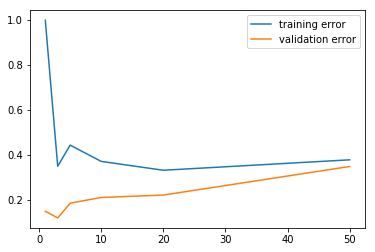

In [41]:
n_neighbors=[1,3,5,10,20,50]
train_errors,validation_errors=validation_curve(KNC,cv3_train,star_train,param_name='n_neighbors',param_range=n_neighbors,cv=cv)

plt.plot(n_neighbors,train_errors.mean(axis=1),label='training error')
plt.plot(n_neighbors,validation_errors.mean(axis=1),label='validation error')
plt.legend(loc='best')

In [42]:
knc=KNeighborsClassifier(n_neighbors=20).fit(cv3_train,star_train)
star_pred_cv3K=knc.predict(cv3_test)
np.mean(star_pred_cv3K==star_test)

0.19920119820269597

----LinearRegression()

In [43]:
LR.fit(cv3_train,star_train)
star_pred_LR=LR.predict(cv3_test)

LR.score(cv3_test,star_test)

-0.6762652203685675

----KNeighborsRegressor

In [44]:
KNR.fit(cv2_train,star_train)
star_pred_KNR=KNR.predict(cv2_test)

KNR.score(cv2_test,star_test)

-0.8457075652986392

----svm()

In [45]:
clf.fit(cv2_train,star_train)
clf.score(cv2_test,star_test)

0.20519221168247628

----GridSearchCV(SVR())

In [46]:
from sklearn.svm import SVR
from sklearn.model_selection import KFold
cv=KFold(shuffle=True)

from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.001,0.01,0.1,1,10],'gamma':[0.001,0.01,0.1,1]}

grid=GridSearchCV(SVR(),param_grid=param_grid,cv=cv,verbose=3)
grid.fit(cv3_train,star_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.001, gamma=0.001 ............................................
[CV] .. C=0.001, gamma=0.001, score=-0.0635381149662777, total=  47.3s
[CV] C=0.001, gamma=0.001 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV] . C=0.001, gamma=0.001, score=-0.06469703099329593, total=  45.9s
[CV] C=0.001, gamma=0.001 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.5min remaining:    0.0s


[CV] . C=0.001, gamma=0.001, score=-0.08374803359165806, total=  50.8s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .. C=0.001, gamma=0.01, score=-0.06361268633643902, total= 1.1min
[CV] C=0.001, gamma=0.01 .............................................
[CV] .. C=0.001, gamma=0.01, score=-0.06456277327865512, total= 1.0min
[CV] C=0.001, gamma=0.01 .............................................
[CV] .. C=0.001, gamma=0.01, score=-0.08390557555093192, total=  52.9s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] ... C=0.001, gamma=0.1, score=-0.06368233433084325, total=  45.8s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] ... C=0.001, gamma=0.1, score=-0.06477271562367481, total=  46.3s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] ... C=0.001, gamma=0.1, score=-0.08402427145780189, total=  48.6s
[CV] C=0.001, gamma=1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 96.3min finished


-0.0023348991248977637
{'C': 10, 'gamma': 0.1}


In [50]:
grid.predict(cv3_test)
print(grid.best_score_)
print(grid.best_params_)

0.34938010582887313
{'C': 10, 'gamma': 0.001}


In [51]:
svr=SVR(gamma=0.1,C=10)
svr.fit(cv3_train,star_train)
svr.score(cv3_test,star_test)

-0.25379786124288306

----CountVectorizer(ngram_range=(1, 3))

In [52]:
vectorizer13 = CountVectorizer(ngram_range=(1, 3))
vectorizer.fit(text_train)
cv13_train=vectorizer.transform(text_train)
cv13_test=vectorizer.transform(text_test)

----LogisticRegression()

In [53]:
logr=LogisticRegression()
logr.fit(cv13_train,star_train)
logr.score(cv13_test,star_test)

0.20668996505242138

In [54]:
star_pred_13=logreg(logr, cv13_train, cv13_test, star_train)
np.mean(star_pred_13==star_test)

0.07338991512730904

----KNeighborsClassifier()

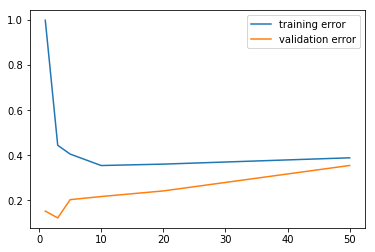

In [55]:
n_neighbors=[1,3,5,10,20,50]
train_errors,validation_errors=validation_curve(KNC,cv13_train,star_train,param_name='n_neighbors',param_range=n_neighbors,cv=cv)

plt.plot(n_neighbors,train_errors.mean(axis=1),label='training error')
plt.plot(n_neighbors,validation_errors.mean(axis=1),label='validation error')
plt.legend(loc='best')

In [56]:
knc=KNeighborsClassifier(n_neighbors=10).fit(cv13_train,star_train)
star_pred_cv13K=knc.predict(cv13_test)
np.mean(star_pred_cv13K==star_test)

0.18771842236645034

----LinearRegression()

In [57]:
LR.fit(cv13_train,star_train)
star_pred_LR=LR.predict(cv13_test)

LR.score(cv13_test,star_test)

-0.6762652203685675

----KNeighborsRegressor

In [58]:
KNR.fit(cv13_train,star_train)
star_pred_KNR=KNR.predict(cv13_test)

KNR.score(cv13_test,star_test)

-0.17828452748890888

----svm()

In [59]:
clf.fit(cv13_train,star_train)
clf.score(cv13_test,star_test)

0.20519221168247628

----GridSearchCV(SVR())

In [60]:
from sklearn.svm import SVR
from sklearn.model_selection import KFold
cv=KFold(shuffle=True)

from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.001,0.01,0.1,1,10],'gamma':[0.001,0.01,0.1,1]}

grid=GridSearchCV(SVR(),param_grid=param_grid,cv=cv,verbose=3)

In [61]:
grid.fit(cv13_train,star_train)
grid.predict(cv13_test)
print(grid.best_score_)
print(grid.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.001, gamma=0.001 ............................................
[CV] .. C=0.001, gamma=0.001, score=-0.0650400908491604, total= 1.3min
[CV] C=0.001, gamma=0.001 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min remaining:    0.0s


[CV] . C=0.001, gamma=0.001, score=-0.06692369946592658, total= 1.1min
[CV] C=0.001, gamma=0.001 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.0min remaining:    0.0s


[CV] . C=0.001, gamma=0.001, score=-0.07949105678330803, total= 1.1min
[CV] C=0.001, gamma=0.01 .............................................
[CV] .. C=0.001, gamma=0.01, score=-0.06410418645300253, total= 1.1min
[CV] C=0.001, gamma=0.01 .............................................
[CV] .. C=0.001, gamma=0.01, score=-0.06707021703391636, total= 1.1min
[CV] C=0.001, gamma=0.01 .............................................
[CV] .. C=0.001, gamma=0.01, score=-0.07962924330775922, total= 1.0min
[CV] C=0.001, gamma=0.1 ..............................................
[CV] ... C=0.001, gamma=0.1, score=-0.06515727789418335, total= 1.0min
[CV] C=0.001, gamma=0.1 ..............................................
[CV] ... C=0.001, gamma=0.1, score=-0.06721312693777914, total= 1.0min
[CV] C=0.001, gamma=0.1 ..............................................
[CV] ... C=0.001, gamma=0.1, score=-0.07958195473487373, total=  59.5s
[CV] C=0.001, gamma=1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 130.2min finished


-0.002404901536611298
{'C': 10, 'gamma': 1}
